In [19]:
import random
import numpy as np
import pandas as pd
import sklearn.model_selection
import sklearn.linear_model
from sklearn import svm
import matplotlib.pyplot as plt

In [13]:
DATASET = '../datasets/blobs2.csv'
data = pd.read_csv(DATASET)
train_data, test_data = sklearn.model_selection.train_test_split(data, train_size=0.8, test_size=0.2)

In [115]:
def plot_data(data, markersize, colors):    
    def plot_class(number):
        def get_class(number):
            return [row for index, row in data.iterrows()
                    if row['label'] == number]
        
        def get_column(column):
            return [row[column] for row in get_class(number)]
        
        plt.plot(get_column('x'), get_column('y'), 'o',
                 markersize=markersize, color=colors[number])

    for number in range(2):
        plot_class(number)
        
def create_projection_data(predictor):
    points = []
    for x in np.linspace(-2, 6, 150):
        for y in np.linspace(-1, 7, 150):
            points.append([x, y, predictor.predict([[x, y]])[0]])
    return pd.DataFrame(points, columns=['x', 'y', 'label'])
        
def plot_support_vectors(support_vectors):
    for vector in support_vectors:
        plt.plot(*vector, 'wo')
    
def show_graph(predictor, support_vectors):
    projection_data = create_projection_data(predictor)
    plot_data(projection_data, markersize=4, colors=['#B9B9FF', '#FFD4D4'])
    plot_data(test_data, markersize=4, colors=['blue', 'red'])
    plot_support_vectors(support_vectors)
    plt.show()

In [116]:
kernels = ['linear', 'poly', 'poly', 'poly', 'rbf']
degrees = [0, 2, 3, 5, 0]
predictors = []
support_vectors = []
for kernel, degree in zip(kernels, degrees):
    clf = svm.SVC(kernel=kernel, degree=degree, gamma='auto')
    clf.fit(train_data[['x', 'y']].values, train_data['label'].values)
    support_vectors.append(clf.support_vectors_)
    predictors.append(clf)

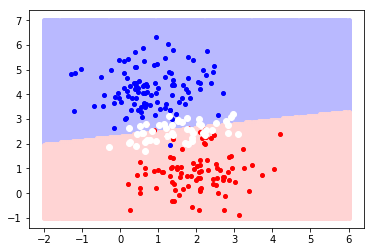

In [117]:
show_graph(predictors[0], support_vectors[0])

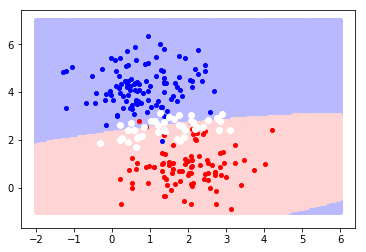

In [118]:
show_graph(predictors[1], support_vectors[1])

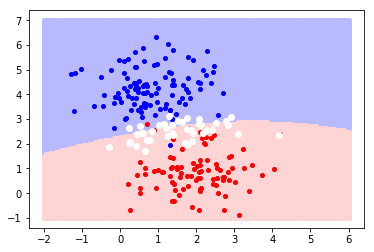

In [119]:
show_graph(predictors[2], support_vectors[2])

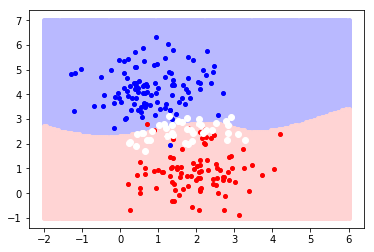

In [120]:
show_graph(predictors[3], support_vectors[3])

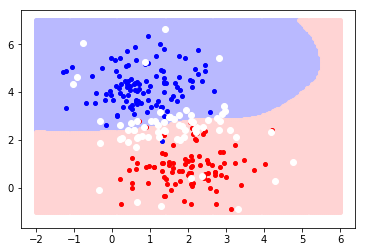

In [121]:
show_graph(predictors[4], support_vectors[4])